## k-means clustering

Text(0.5, 1.0, 'original data')

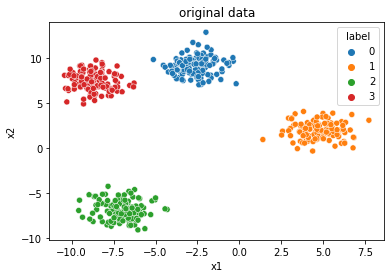

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

df = pd.DataFrame([X[:,0], X[:,1], y]).T

df.columns = ['x1', 'x2', 'label']
df['label'] = df['label'].astype(int)

sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'label', palette = 'tab10')
plt.title('original data')

In [7]:
X = df.drop('label', axis = 1)
X.head(3)

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871


## Feature scale data

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:3]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895]])

In [13]:
scaled_X.std(), scaled_X.mean()

(1.0, -1.0658141036401503e-17)

Text(0.5, 1.0, 'Sacled X with feature strandardisation')

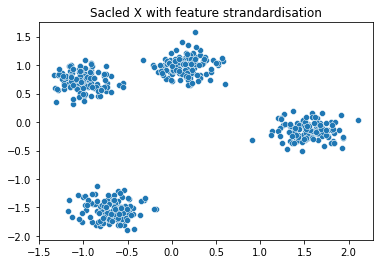

In [14]:
sns.scatterplot(x = scaled_X[:,0], y = scaled_X[:,1])
plt.title('Sacled X with feature strandardisation')

## k-means clustering

[Text(0.5, 1.0, 'Elbow plot'), Text(0.5, 0, 'k clusters'), Text(0, 0.5, 'SSD')]

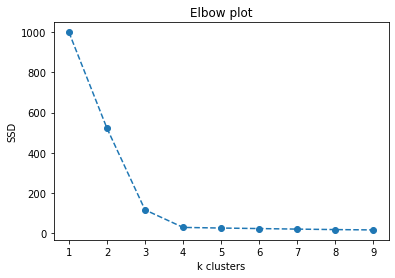

In [17]:
from sklearn.cluster import KMeans

clusters = np.arange(1,10)
sum_square_distances = [KMeans(k).fit(scaled_X).inertia_ for k in clusters]

fig, ax = plt.figure(), plt.axes()

ax.plot(clusters, sum_square_distances, '--o')
ax.set(title='Elbow plot', xlabel='k clusters', ylabel ='SSD')

In [21]:
pd.Series(sum_square_distances).diff()[1:]

1   -477.842946
2   -406.061375
3    -87.308740
4     -3.171573
5     -2.603244
6     -2.689810
7     -2.410023
8     -1.621042
dtype: float64

## Silouhette score

[Text(0.5, 1.0, 'Silouhette plot'),
 Text(0.5, 0, 'kclusters'),
 Text(0, 0.5, 'silouhette score')]

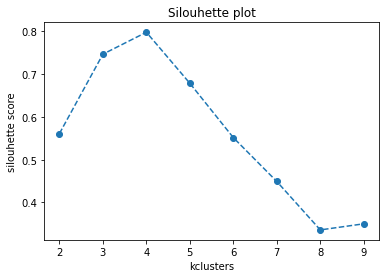

In [24]:
from sklearn.metrics import silhouette_score

fig, ax = plt.figure(), plt.axes()

kmeans = [KMeans(k).fit(scaled_X) for k in clusters]
silouhette_scores = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]

ax.plot(clusters[1:], silouhette_scores, '--o')
ax.set(title ='Silouhette plot', xlabel= 'kclusters', ylabel= 'silouhette score')

## Vizualisation

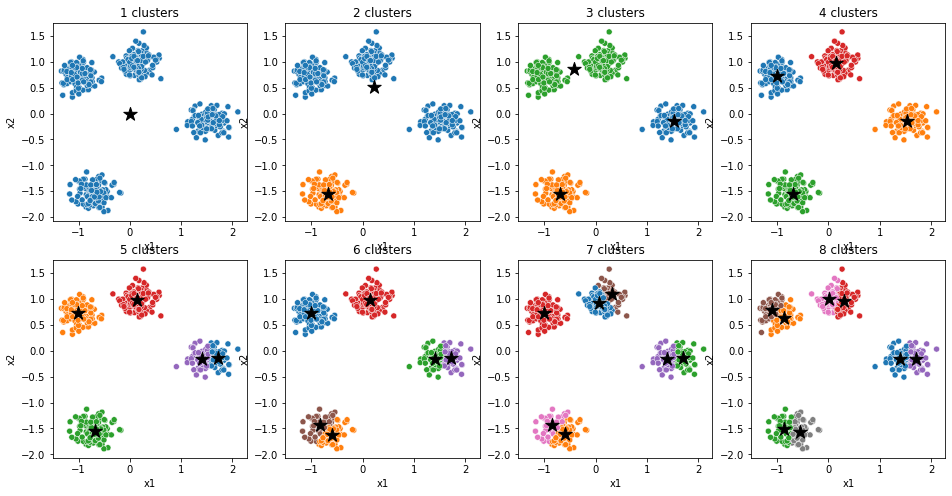

In [28]:
df_plot = pd.DataFrame(scaled_X, columns=['x1', 'x2'])

num_plots_row = round(len(clusters)/2)
fig, axes = plt.subplots(2, num_plots_row, figsize = (16,8))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot['label'] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x = 'x1', y= 'x2', hue= 'label', ax = ax, palette ='tab10')
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = "*", s=200, color ='black')
    ax.legend([],[], frameon = False)
    ax.set(title= f"{i+1} clusters")